<a href="https://colab.research.google.com/github/avigyan24/Stock-Price-Prediction-using-Ensemble-Learning-and-Diemention-Reduction/blob/main/Stacking_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
data=files.upload()

Saving TCS_15.csv to TCS_15.csv


In [ ]:
df=pd.read_csv("TCS_15.csv")
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3698,2023-04-06,3225.000000,3257.350098,3215.000000,3220.699951,3220.699951,1703464.0
3699,2023-04-10,3220.000000,3272.000000,3215.000000,3263.399902,3263.399902,2203187.0
3700,2023-04-11,3264.000000,3272.949951,3192.149902,3213.800049,3213.800049,2348779.0
3701,2023-04-12,3227.949951,3260.949951,3199.000000,3241.649902,3241.649902,2417727.0
3702,2023-04-13,3210.000000,3230.000000,3180.000000,3188.850098,3188.850098,4174070.0


In [ ]:
df=df.dropna()
len(df)

3696

In [ ]:
def rsi(close, periods = 14):

    close_delta = close.diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)

    ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()

    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi
# Calculate money flow index

def gain(x):
    return ((x > 0) * x).sum()


def loss(x):
    return ((x < 0) * x).sum()

def mfi(high, low, close, volume, n=14):
    typical_price = (high + low + close)/3
    money_flow = typical_price * volume
    mf_sign = np.where(typical_price > typical_price.shift(1), 1, -1)
    signed_mf = money_flow * mf_sign
    mf_avg_gain = signed_mf.rolling(n).apply(gain, raw=True)
    mf_avg_loss = signed_mf.rolling(n).apply(loss, raw=True)
    return (100 - (100 / (1 + (mf_avg_gain / abs(mf_avg_loss))))).to_numpy()

def atr(high, low, close, n=14):
    tr = np.amax(np.vstack(((high - low).to_numpy(), (abs(high - close)).to_numpy(), (abs(low - close)).to_numpy())).T, axis=1)
    return pd.Series(tr).rolling(n).mean().to_numpy()

In [ ]:
df['EMA_9']=df['Close'].ewm(5).mean().shift()
df['SMA_50']=df['Close'].rolling(50).mean().shift()
df['SMA_100']=df['Close'].rolling(100).mean().shift()
df['SMA_200']=df['Close'].rolling(200).mean().shift()
df['RSI'] = rsi(df['Close'])
df['MFI'] = mfi(df['High'], df['Low'], df['Close'], df['Volume'], 14)
df['ATR'] = atr(df['High'], df['Low'], df['Close'], 14)
df=df.fillna(df.mean())
df

<ipython-input-6-8290243b4c2b>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df=df.fillna(df.mean())


,Date,Open,High,Low,Close,Adj Close,Volume,EMA_9,SMA_50,SMA_100,SMA_200,RSI,MFI,ATR
0,2008-04-15,230.500000,246.250000,220.100006,243.537506,181.369308,5703772.0,1435.190557,1435.041561,1430.087718,1421.758903,53.158651,52.968404,31.175136
1,2008-04-16,246.250000,250.500000,240.500000,242.975006,180.950348,6438768.0,243.537506,1435.041561,1430.087718,1421.758903,53.158651,52.968404,31.175136
2,2008-04-17,249.925003,252.500000,244.887497,250.225006,186.349609,3999556.0,243.230688,1435.041561,1430.087718,1421.758903,53.158651,52.968404,31.175136
3,2008-04-21,252.250000,258.750000,246.649994,248.350006,184.953293,3399296.0,245.997671,1435.041561,1430.087718,1421.758903,53.158651,52.968404,31.175136
4,2008-04-22,246.237503,246.237503,220.500000,221.800003,165.180801,13785196.0,246.754905,1435.041561,1430.087718,1421.758903,53.158651,52.968404,31.175136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3698,2023-04-06,3225.000000,3257.350098,3215.000000,3220.699951,3220.699951,1703464.0,3183.731981,3345.566001,3334.764504,3258.425999,47.767146,42.591133,55.092861
3699,2023-04-10,3220.000000,3272.000000,3215.000000,3263.399902,3263.399902,2203187.0,3189.893309,3342.717998,3333.812004,3258.819498,53.515889,49.694940,55.750000
3700,2023-04-11,3264.000000,3272.949951,3192.149902,3213.800049,3213.800049,2348779.0,3202.144408,3339.687998,3333.091003,3259.691998,47.039545,58.266660,55.992868
3701,2023-04-12,3227.949951,3260.949951,3199.000000,3241.649902,3241.649902,2417727.0,3204.087015,3335.237998,3331.903003,3260.198999,50.650771,67.456730,55.089303


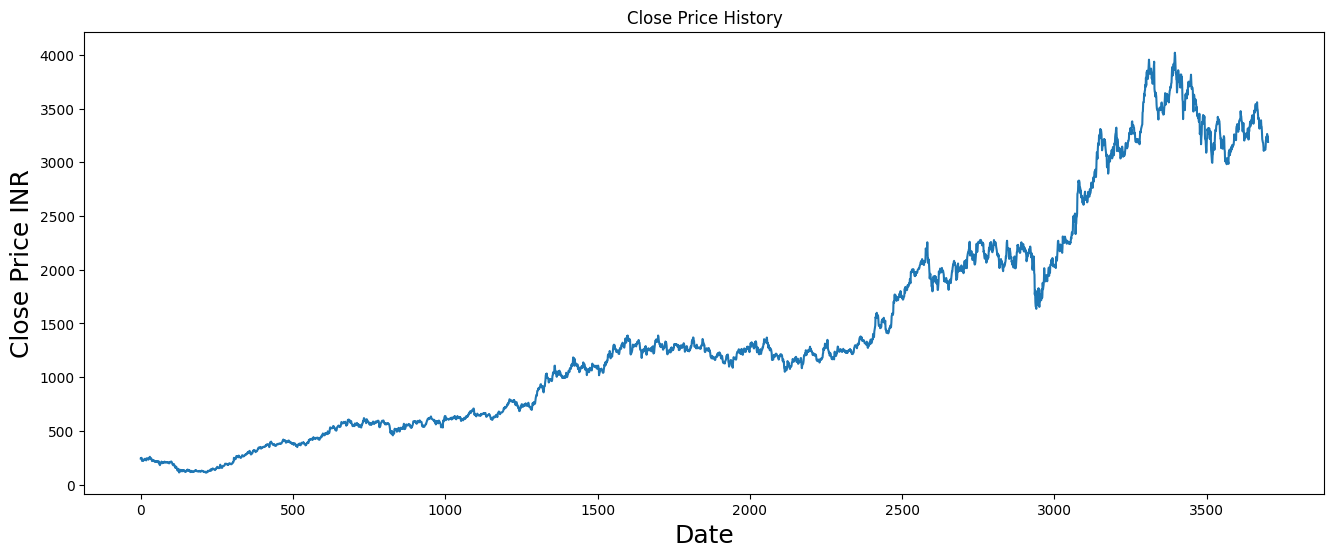

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [ ]:
# seperate out our x and y values
df1=df.drop(['Date','Close'],axis=1)
y_values=df['Close']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
scaled_df = sc.fit_transform(df1)
scaled_df.shape

(3696, 12)

##PCA


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
x_values = pca.fit_transform(scaled_df) # project the original data into the PCA space
x_values

array([[-4.20964421e-01, -5.94125249e-02,  1.92181124e-01, ...,
         2.49917253e-01, -1.24816429e-03, -1.15806250e-02],
       [-5.28289903e-01, -6.49660614e-02,  2.37039628e-01, ...,
        -8.81173368e-03, -2.55947001e-03, -2.45045142e-03],
       [-5.26737365e-01, -6.47467949e-02,  2.35668624e-01, ...,
        -9.00503502e-03, -2.82711666e-03, -2.14636386e-03],
       ...,
       [ 1.40130624e+00, -8.28353140e-03,  1.18272180e-01, ...,
        -6.06637084e-03, -6.79723433e-03,  5.47861262e-03],
       [ 1.39794203e+00,  1.05436538e-01,  1.49604283e-01, ...,
         1.09086143e-03, -8.37494831e-04,  1.62632769e-03],
       [ 1.38740803e+00, -5.20771296e-03,  1.65510738e-01, ...,
         2.11314289e-03, -1.35368218e-03, -1.14838976e-03]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test= train_test_split(x_values,y_values, random_state=0)

##Stacking


In [ ]:
!pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for vecstack: filename=vecstack-0.4.0-py3-none-any.whl size=19879 sha256=96f7bb56cdc574e06532b6e3c9bd6d55bfe8e7fb46d913fd8cad6f2f1389c9b4
  Stored in directory: /root/.cache/pip/wheels/b8/d8/51/3cf39adf22c522b0a91dc2208db4e9de4d2d9d171683596220
Successfully built vecstack


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from vecstack import stacking
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
# Define the base models
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=10, random_state=0)
model3 = DecisionTreeRegressor(random_state=0)
model4 = KNeighborsRegressor(n_neighbors=3)

In [ ]:
meta_model = LinearRegression()

In [ ]:
models = [model1, model2, model3,model4]
S_train, S_test = stacking(models, X_train, y_train, X_test, regression=True, mode='oof_pred_bag', needs_proba=False, save_dir=None, metric=None, n_folds=4, stratified=True, shuffle=True, random_state=0, verbose=2)

/usr/local/lib/python3.10/dist-packages/vecstack/core.py:461: UserWarning: This is regression task hence classification-specific parameters set to <True> were ignored: <stratified>
  warnings.warn(warn_str, UserWarning)


task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [LinearRegression]
    fold  0:  [6.05478512]
    fold  1:  [6.50041883]
    fold  2:  [6.44624511]
    fold  3:  [6.63273615]
    ----
    MEAN:     [6.40854630] + [0.21521490]
    FULL:     [6.40854630]

model  1:     [RandomForestRegressor]
    fold  0:  [14.82588090]
    fold  1:  [16.20941973]
    fold  2:  [14.88791072]
    fold  3:  [17.70210427]
    ----
    MEAN:     [15.90632891] + [1.17486347]
    FULL:     [15.90632891]

model  2:     [DecisionTreeRegressor]
    fold  0:  [20.06938937]
    fold  1:  [22.59204505]
    fold  2:  [21.01592450]
    fold  3:  [21.40699686]
    ----
    MEAN:     [21.27108895] + [0.90451462]
    FULL:     [21.27108895]

model  3:     [KNeighborsRegressor]
    fold  0:  [19.29391709]
    fold  1:  [19.56133443]
    fold  2:  [18.84779423]
    fold  3:  [20.20347655]
    ----
    MEAN:     [19.47663057] + [0.49099368]
    FUL

In [ ]:
meta_model.fit(S_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data
y_pred = meta_model.predict(S_test)


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import math

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse=math.sqrt(mse)

def mean_absolute_percentage_error(true, pred):
    abs_error = (np.abs(true - pred)) / true
    sum_abs_error = np.sum(abs_error)
    mape_loss = (sum_abs_error / true.size) * 100
    return mape_loss

mae=mean_absolute_error(y_test,y_pred)

In [ ]:
print("RMSE=",rmse)
print("MAPE=",mape)
print("MAE=",mae)


RMSE= 8.149998581118107
MAPE= 0.5789438757418023
MAE= 5.685179273318712
